# Is the Mushroom Poisonous?

<b> Load the data </b>

In [1]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
url_path = 'https://raw.githubusercontent.com/PacktWorkshops/The-Data-Science-Workshop/master/Chapter08/Dataset/agaricus-lepiota.data'

In [3]:
df = pd.read_csv(url_path, header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


<b> Separate the target, y and features, X from the dataset </b>

In [4]:
y = df[0]
X = df.iloc[:, 1:]

<b> Recode the target, y, so that poisonous mushrooms are represented as 1 and edible mushrooms as 0 </b>

In [5]:
y = (y == 'p') * 1
y

0       1
1       0
2       0
3       1
4       0
       ..
8119    0
8120    0
8121    0
8122    1
8123    0
Name: 0, Length: 8124, dtype: int32

<b> Transform the columns of the feature set X into a numpy array with a binary representation </b>

In [6]:
encoder = OneHotEncoder()
encoder.fit(X)

OneHotEncoder()

In [7]:
X = encoder.transform(X).toarray()

<b> Conduct both a grid and random search to find an optimal hyperparameterization for a random forest classifier. Use accuracy as your method of model evaluation. Make sure that when you initialize the classifier and when you conduct your random search, random_state = 100 </b>

Grid Search

In [8]:
rfc = RandomForestClassifier(n_estimators=100, random_state=100)

In [9]:
grid = {'criterion': ['gini', 'entropy'], 
       'max_features': [2, 4, 6, 8, 10, 12, 14]}

In [10]:
gscv = GridSearchCV(estimator=rfc,
                   param_grid=grid,
                   cv=5,
                   scoring='accuracy')

In [11]:
gscv.fit(X, y)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=100),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': [2, 4, 6, 8, 10, 12, 14]},
             scoring='accuracy')

In [12]:
results = pd.DataFrame(gscv.cv_results_)
results.sort_values('rank_test_score', ascending=True).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
9,0.613011,0.026807,0.042924,0.003946,entropy,6,"{'criterion': 'entropy', 'max_features': 6}",0.842462,1.0,0.999385,1.0,0.838670,0.936103,0.078016,1
13,0.770265,0.034606,0.041699,0.004220,entropy,14,"{'criterion': 'entropy', 'max_features': 14}",0.842462,1.0,1.000000,1.0,0.821429,0.932778,0.082598,2
6,0.802082,0.048348,0.042026,0.004054,gini,14,"{'criterion': 'gini', 'max_features': 14}",0.842462,1.0,1.000000,1.0,0.819581,0.932409,0.083098,3
10,0.658945,0.028836,0.041114,0.005019,entropy,8,"{'criterion': 'entropy', 'max_features': 8}",0.842462,1.0,1.000000,1.0,0.806034,0.929699,0.086868,4
4,0.672076,0.068435,0.066852,0.054272,gini,10,"{'criterion': 'gini', 'max_features': 10}",0.842462,1.0,1.000000,1.0,0.798030,0.928098,0.089175,5


Random Search

In [13]:
param_dict = {'criterion':['gini', 'entropy'],
             'max_features': stats.randint(low=1, high=X.shape[1])}

In [14]:
rscv = RandomizedSearchCV(estimator=rfc,
                         param_distributions=param_dict,
                         n_iter=50,
                         cv=5,
                         scoring='accuracy',
                         random_state=100)
rscv.fit(X, y)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=100),
                   n_iter=50,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000130D8EE0708>},
                   random_state=100, scoring='accuracy')

In [15]:
results = pd.DataFrame(rscv.cv_results_)
results.sort_values('rank_test_score', ascending=True).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
6,2.739950,0.454390,0.041096,0.007893,gini,99,"{'criterion': 'gini', 'max_features': 99}",1.0,1.0,0.996308,1.0,0.745074,0.948276,0.101611,1
25,2.197688,0.210652,0.037989,0.006225,gini,106,"{'criterion': 'gini', 'max_features': 106}",1.0,1.0,0.996308,1.0,0.745074,0.948276,0.101611,1
29,2.218263,0.293698,0.028268,0.003178,gini,111,"{'criterion': 'gini', 'max_features': 111}",1.0,1.0,0.995692,1.0,0.739532,0.947045,0.103770,3
41,2.228423,0.305305,0.034775,0.007464,gini,105,"{'criterion': 'gini', 'max_features': 105}",1.0,1.0,0.996308,1.0,0.737685,0.946798,0.104567,4
10,3.514891,1.645684,0.040879,0.018097,gini,108,"{'criterion': 'gini', 'max_features': 108}",1.0,1.0,0.996308,1.0,0.737685,0.946798,0.104567,4


<b> Plot the mean test score versus hyperparameterization for the top 10 models found using random search </b>

In [16]:
results.loc[:, 'params'] = results.loc[:, 'params'].astype(str)

In [17]:
results = results.sort_values('rank_test_score', ascending=False).loc[:, ['params', 'mean_test_score']].drop_duplicates().head(10)

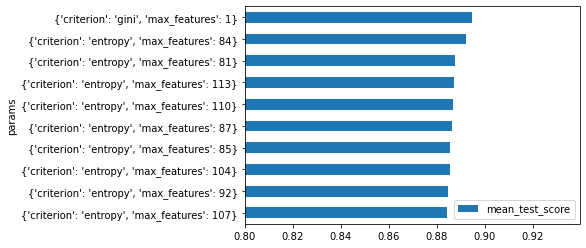

In [18]:
results.plot.barh(x='params', xlim=(0.8))
plt.show()